In [1]:
# import of standard Python libraries for data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import needed objects from Scikit learn library for machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [3]:
# I would like to see all rows and columns of dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# reading dataset
df = pd.read_csv("final_data.csv")

In [5]:
df.head()

,elevation,massif_num,lon,lat,temp_soil_0.005_m,temp_soil_0.08_m,liquid_water_in_soil,frozen_water_in_soil,risk_index,aval_type,whiteness_albedo,net_radiation,drainage,runoff,snow_melting_rate,rainfall_rate,surface_temperature,surface_snow_amount,thickness_of_snowfall,snow_thickness_1D,snow_thickness_3D,snow_thickness_5D,snow_thickness_7D,snow_water_1D,snow_water_3D,snow_water_5D,snow_water_7D,penetration_ram_resistance,thickness_of_wet_snow_top_of_snowpack,thickness_of_frozen_snow_top_of_snowpack,acccidental_risk_index,day,surface_air_pressure_mean,near_surface_humidity_mean,relative_humidity_mean,freezing_level_altitude_mean,rain_snow_transition_altitude_mean,air_temp_max,wind_speed_max,snowfall_rate_max,nebulosity_max,air_temp_min,massif_name,aval_accident,aval_event
0,1500.0,1,6.64493,46.17685,277.709158,279.014864,0.323705,0.0,6.0,6.0,0.2,3.251180,0.000018,0.000019,0.0,0.000096,277.709158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010-10-01,84550.445,0.005956,80.023400,2268.572667,422.333333,283.38647,4.92501,0.0,0.988523,277.14102,Chablais,0,0
1,1500.0,1,6.64493,46.17685,279.496314,280.143477,0.310928,0.0,6.0,6.0,0.2,79.345799,0.000018,0.000000,0.0,0.000000,279.496314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010-10-02,84550.445,0.006067,58.228333,1080.672643,40.151042,288.89374,4.92201,0.0,0.758338,281.01437,Chablais,0,0
2,1500.0,1,6.64493,46.17685,278.575394,280.282568,0.305990,0.0,6.0,6.0,0.2,44.215499,0.000018,0.000000,0.0,0.000000,278.575394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010-10-03,84550.445,0.006655,61.123905,1194.040409,11.500000,290.59950,3.32201,0.0,0.627164,282.84122,Chablais,0,0
3,1500.0,1,6.64493,46.17685,280.511023,281.446828,0.301774,0.0,6.0,6.0,0.2,73.435071,0.000018,0.000000,0.0,0.000000,280.511023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010-10-04,84550.445,0.005970,58.574722,1937.796566,718.493056,291.77880,5.22301,0.0,0.996815,281.35240,Chablais,0,0
4,1500.0,1,6.64493,46.17685,280.790508,281.635283,0.319800,0.0,6.0,6.0,0.2,17.299822,0.000018,0.000008,0.0,0.000047,280.790508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010-10-05,84550.445,0.007777,94.231740,1837.712598,515.784722,284.17500,4.12301,0.0,0.982423,280.60666,Chablais,0,0


In [6]:
# viewing all variables to decide which are not useful
df.columns

Index(['elevation', 'massif_num', 'lon', 'lat', 'temp_soil_0.005_m',
       'temp_soil_0.08_m', 'liquid_water_in_soil', 'frozen_water_in_soil',
       'risk_index', 'aval_type', 'whiteness_albedo', 'net_radiation',
       'drainage', 'runoff', 'snow_melting_rate', 'rainfall_rate',
       'surface_temperature', 'surface_snow_amount', 'thickness_of_snowfall',
       'snow_thickness_1D', 'snow_thickness_3D', 'snow_thickness_5D',
       'snow_thickness_7D', 'snow_water_1D', 'snow_water_3D', 'snow_water_5D',
       'snow_water_7D', 'penetration_ram_resistance',
       'thickness_of_wet_snow_top_of_snowpack',
       'thickness_of_frozen_snow_top_of_snowpack', 'acccidental_risk_index',
       'day', 'surface_air_pressure_mean', 'near_surface_humidity_mean',
       'relative_humidity_mean', 'freezing_level_altitude_mean',
       'rain_snow_transition_altitude_mean', 'air_temp_max', 'wind_speed_max',
       'snowfall_rate_max', 'nebulosity_max', 'air_temp_min', 'massif_name',
       'aval_accid

In [7]:
# removing variables not needed for random forest model
df_clean = df.drop(columns=["massif_num","lon","lat","aval_type", "acccidental_risk_index", 
                            'snow_thickness_1D', 'snow_thickness_3D', 'snow_thickness_5D',
                           'snow_water_1D', 'snow_water_3D', 'snow_water_5D', 'risk_index',
                           'thickness_of_wet_snow_top_of_snowpack','thickness_of_frozen_snow_top_of_snowpack',
                           'surface_air_pressure_mean', 'rainfall_rate', 'drainage', 'runoff',
                           'liquid_water_in_soil', 'frozen_water_in_soil', 'elevation','snow_melting_rate'])

In [8]:
# viewing if data type of the variables is suitable for Random Forest
# there are 2 string categorical variables that needs to be transformed: day and massif name
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540818 entries, 0 to 540817
Data columns (total 23 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   temp_soil_0.005_m                   540818 non-null  float64
 1   temp_soil_0.08_m                    540818 non-null  float64
 2   whiteness_albedo                    540818 non-null  float64
 3   net_radiation                       540818 non-null  float64
 4   surface_temperature                 540818 non-null  float64
 5   surface_snow_amount                 540818 non-null  float64
 6   thickness_of_snowfall               540818 non-null  float64
 7   snow_thickness_7D                   540818 non-null  float64
 8   snow_water_7D                       540818 non-null  float64
 9   penetration_ram_resistance          540818 non-null  float64
 10  day                                 540818 non-null  object 
 11  near_surface_humidity_mean

In [9]:
df_clean.shape

(540818, 23)

In [10]:
# for transformation of massif names I will use OneHotEncoding with pd.get_dummies method
# selecting of values for dummies
df_clean.massif_name.unique()

array(['Chablais', 'Aravis', 'Mont-Blanc', 'Bauges', 'Beaufortin',
       'Hte-tarent', 'Chartreuse', 'Belledonne', 'Maurienne', 'Vanoise',
       'Hte-maurie', 'Gdes-rouss', 'Thabor', 'Vercors', 'Oisans',
       'Pelvoux', 'Queyras', 'Devoluy', 'Champsaur', 'Parpaillon',
       'Ubaye', 'Ht_Var-Ver', 'Mercantour'], dtype=object)

In [11]:
massifs = ('Chablais', 'Aravis', 'Mont-Blanc', 'Bauges', 'Beaufortin',
       'Hte-tarent', 'Chartreuse', 'Belledonne', 'Maurienne', 'Vanoise',
       'Hte-maurie', 'Gdes-rouss', 'Thabor', 'Vercors', 'Oisans',
       'Pelvoux', 'Queyras', 'Devoluy', 'Champsaur', 'Parpaillon',
       'Ubaye', 'Ht_Var-Ver', 'Mercantour')

In [12]:
# creating initial dataframe
df_massifs = pd.DataFrame(massifs, columns=['massif_name'])

# generate binary values using get_dummies
dum_df = pd.get_dummies(df_massifs, columns=["massif_name"], prefix="massif")

# merge initial dataframe with dummies
df_massifs = df_massifs.join(dum_df)

# merge final datatset with dataframe with dummies
df_clean = df_clean.merge(df_massifs, how="left", on="massif_name")

In [13]:
# checking dataset with dummy variables
df_clean.head()

,temp_soil_0.005_m,temp_soil_0.08_m,whiteness_albedo,net_radiation,surface_temperature,surface_snow_amount,thickness_of_snowfall,snow_thickness_7D,snow_water_7D,penetration_ram_resistance,day,near_surface_humidity_mean,relative_humidity_mean,freezing_level_altitude_mean,rain_snow_transition_altitude_mean,air_temp_max,wind_speed_max,snowfall_rate_max,nebulosity_max,air_temp_min,massif_name,aval_accident,aval_event,massif_Aravis,massif_Bauges,massif_Beaufortin,massif_Belledonne,massif_Chablais,massif_Champsaur,massif_Chartreuse,massif_Devoluy,massif_Gdes-rouss,massif_Ht_Var-Ver,massif_Hte-maurie,massif_Hte-tarent,massif_Maurienne,massif_Mercantour,massif_Mont-Blanc,massif_Oisans,massif_Parpaillon,massif_Pelvoux,massif_Queyras,massif_Thabor,massif_Ubaye,massif_Vanoise,massif_Vercors
0,277.709158,279.014864,0.2,3.251180,277.709158,0.0,0.0,0.0,0.0,0.0,2010-10-01,0.005956,80.023400,2268.572667,422.333333,283.38647,4.92501,0.0,0.988523,277.14102,Chablais,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,279.496314,280.143477,0.2,79.345799,279.496314,0.0,0.0,0.0,0.0,0.0,2010-10-02,0.006067,58.228333,1080.672643,40.151042,288.89374,4.92201,0.0,0.758338,281.01437,Chablais,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,278.575394,280.282568,0.2,44.215499,278.575394,0.0,0.0,0.0,0.0,0.0,2010-10-03,0.006655,61.123905,1194.040409,11.500000,290.59950,3.32201,0.0,0.627164,282.84122,Chablais,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,280.511023,281.446828,0.2,73.435071,280.511023,0.0,0.0,0.0,0.0,0.0,2010-10-04,0.005970,58.574722,1937.796566,718.493056,291.77880,5.22301,0.0,0.996815,281.35240,Chablais,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,280.790508,281.635283,0.2,17.299822,280.790508,0.0,0.0,0.0,0.0,0.0,2010-10-05,0.007777,94.231740,1837.712598,515.784722,284.17500,4.12301,0.0,0.982423,280.60666,Chablais,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
# getting rid of redundant variable
df_clean = df_clean.drop(columns=['massif_name'])

In [15]:
# second categorical variable to transform is day
# slicing is used to get years and months from day variable
# and after we need to transform years and months to integers
df_clean["year"] = (df_clean.day.str[:4]).astype(int)
df_clean["month"] = (df_clean.day.str[5:7]).astype(int)
df_clean.head()

,temp_soil_0.005_m,temp_soil_0.08_m,whiteness_albedo,net_radiation,surface_temperature,surface_snow_amount,thickness_of_snowfall,snow_thickness_7D,snow_water_7D,penetration_ram_resistance,day,near_surface_humidity_mean,relative_humidity_mean,freezing_level_altitude_mean,rain_snow_transition_altitude_mean,air_temp_max,wind_speed_max,snowfall_rate_max,nebulosity_max,air_temp_min,aval_accident,aval_event,massif_Aravis,massif_Bauges,massif_Beaufortin,massif_Belledonne,massif_Chablais,massif_Champsaur,massif_Chartreuse,massif_Devoluy,massif_Gdes-rouss,massif_Ht_Var-Ver,massif_Hte-maurie,massif_Hte-tarent,massif_Maurienne,massif_Mercantour,massif_Mont-Blanc,massif_Oisans,massif_Parpaillon,massif_Pelvoux,massif_Queyras,massif_Thabor,massif_Ubaye,massif_Vanoise,massif_Vercors,year,month
0,277.709158,279.014864,0.2,3.251180,277.709158,0.0,0.0,0.0,0.0,0.0,2010-10-01,0.005956,80.023400,2268.572667,422.333333,283.38647,4.92501,0.0,0.988523,277.14102,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,10
1,279.496314,280.143477,0.2,79.345799,279.496314,0.0,0.0,0.0,0.0,0.0,2010-10-02,0.006067,58.228333,1080.672643,40.151042,288.89374,4.92201,0.0,0.758338,281.01437,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,10
2,278.575394,280.282568,0.2,44.215499,278.575394,0.0,0.0,0.0,0.0,0.0,2010-10-03,0.006655,61.123905,1194.040409,11.500000,290.59950,3.32201,0.0,0.627164,282.84122,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,10
3,280.511023,281.446828,0.2,73.435071,280.511023,0.0,0.0,0.0,0.0,0.0,2010-10-04,0.005970,58.574722,1937.796566,718.493056,291.77880,5.22301,0.0,0.996815,281.35240,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,10
4,280.790508,281.635283,0.2,17.299822,280.790508,0.0,0.0,0.0,0.0,0.0,2010-10-05,0.007777,94.231740,1837.712598,515.784722,284.17500,4.12301,0.0,0.982423,280.60666,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,10


In [16]:
# getting rid of redundant variable
df_clean = df_clean.drop(columns=['day', 'year'])

In [17]:
# checking dataset with new time variables
df_clean.head()

,temp_soil_0.005_m,temp_soil_0.08_m,whiteness_albedo,net_radiation,surface_temperature,surface_snow_amount,thickness_of_snowfall,snow_thickness_7D,snow_water_7D,penetration_ram_resistance,near_surface_humidity_mean,relative_humidity_mean,freezing_level_altitude_mean,rain_snow_transition_altitude_mean,air_temp_max,wind_speed_max,snowfall_rate_max,nebulosity_max,air_temp_min,aval_accident,aval_event,massif_Aravis,massif_Bauges,massif_Beaufortin,massif_Belledonne,massif_Chablais,massif_Champsaur,massif_Chartreuse,massif_Devoluy,massif_Gdes-rouss,massif_Ht_Var-Ver,massif_Hte-maurie,massif_Hte-tarent,massif_Maurienne,massif_Mercantour,massif_Mont-Blanc,massif_Oisans,massif_Parpaillon,massif_Pelvoux,massif_Queyras,massif_Thabor,massif_Ubaye,massif_Vanoise,massif_Vercors,month
0,277.709158,279.014864,0.2,3.251180,277.709158,0.0,0.0,0.0,0.0,0.0,0.005956,80.023400,2268.572667,422.333333,283.38647,4.92501,0.0,0.988523,277.14102,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
1,279.496314,280.143477,0.2,79.345799,279.496314,0.0,0.0,0.0,0.0,0.0,0.006067,58.228333,1080.672643,40.151042,288.89374,4.92201,0.0,0.758338,281.01437,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
2,278.575394,280.282568,0.2,44.215499,278.575394,0.0,0.0,0.0,0.0,0.0,0.006655,61.123905,1194.040409,11.500000,290.59950,3.32201,0.0,0.627164,282.84122,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
3,280.511023,281.446828,0.2,73.435071,280.511023,0.0,0.0,0.0,0.0,0.0,0.005970,58.574722,1937.796566,718.493056,291.77880,5.22301,0.0,0.996815,281.35240,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
4,280.790508,281.635283,0.2,17.299822,280.790508,0.0,0.0,0.0,0.0,0.0,0.007777,94.231740,1837.712598,515.784722,284.17500,4.12301,0.0,0.982423,280.60666,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10


In [18]:
# verifying there are no null values in dataset
(df_clean.apply(lambda x: x.isnull().sum())).sum()

0

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540818 entries, 0 to 540817
Data columns (total 45 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   temp_soil_0.005_m                   540818 non-null  float64
 1   temp_soil_0.08_m                    540818 non-null  float64
 2   whiteness_albedo                    540818 non-null  float64
 3   net_radiation                       540818 non-null  float64
 4   surface_temperature                 540818 non-null  float64
 5   surface_snow_amount                 540818 non-null  float64
 6   thickness_of_snowfall               540818 non-null  float64
 7   snow_thickness_7D                   540818 non-null  float64
 8   snow_water_7D                       540818 non-null  float64
 9   penetration_ram_resistance          540818 non-null  float64
 10  near_surface_humidity_mean          540818 non-null  float64
 11  relative_humidity_mean    

## Problem with very imbalanced dataset
- metrics like ROC AUC or Accuracy will be very high, but that does not provide any significant insight, because of imbalanced dataset with majority of No avalanche accidents
- in classification report metrics **Precision will have lesser importance for my analysis than Recall**, because I want to reduce number of False Negatives rather then number of False Positives

In [20]:
round((df_clean.aval_accident.value_counts()/540818)*100, 2)

0    99.3
1     0.7
Name: aval_accident, dtype: float64

## Vanilla Undersampling with RF class weight 'balanced_subsample'
- strategy to improve recall and F1 score, especially for cases where avalanche events happened
- class weight balanced subsample is used because in previous iterations of model this class weight had the best performance metrics

In [21]:
# Class count
count_class_0, count_class_1 = df_clean.aval_accident.value_counts()

# Divide by class
df_class_0 = df_clean[df_clean['aval_accident'] == 0]
df_class_1 = df_clean[df_clean['aval_accident'] == 1]

Random under-sampling:
1    3778
0    3778
Name: aval_accident, dtype: int64


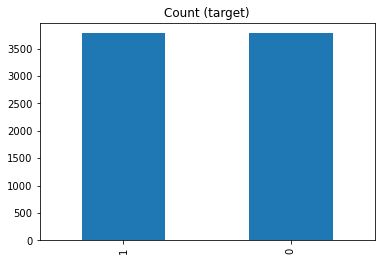

In [22]:
df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.aval_accident.value_counts())

df_test_under.aval_accident.value_counts().plot(kind='bar', title='Count (target)');

In [23]:
features_ac = df_test_under.drop(columns=['aval_event', 'aval_accident'])
labels_ac = np.array(df_test_under['aval_accident'])

In [24]:
# Saving feature names for later use
feature_list_ac = list(features_ac.columns)

# Convert to numpy array
features_ac = np.array(features_ac)

In [25]:
train_features_ac, test_features_ac, train_labels_ac, test_labels_ac = train_test_split(features_ac, labels_ac, test_size = 0.33, random_state = 42)

In [26]:
print('Training Features Shape:', train_features_ac.shape)
print('Training Labels Shape:', train_labels_ac.shape)
print('Testing Features Shape:', test_features_ac.shape)
print('Testing Labels Shape:', test_labels_ac.shape)

Training Features Shape: (5062, 43)
Training Labels Shape: (5062,)
Testing Features Shape: (2494, 43)
Testing Labels Shape: (2494,)


In [27]:
type(train_features_ac)

numpy.ndarray

In [28]:
train_features_ac.dtype

dtype('float64')

In [29]:
# https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652

In [30]:
%%time
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# generate dataset
features_ac, labels_ac = make_classification(n_samples=20000, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# define model
rfc_ac=RandomForestClassifier(n_estimators=100, class_weight='balanced_subsample')

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(rfc_ac, features_ac, labels_ac, scoring='roc_auc', cv=cv, n_jobs=-1)

# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.978
Wall time: 21.2 s


In [31]:
%%time
rfc_ac.fit(train_features_ac,train_labels_ac)

label_pred_ac=rfc_ac.predict(test_features_ac)

Wall time: 2.4 s


In [32]:
print(confusion_matrix(test_labels_ac, label_pred_ac))

[[1083  181]
 [  83 1147]]


In [33]:
print(classification_report(test_labels_ac, label_pred_ac))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      1264
           1       0.86      0.93      0.90      1230

    accuracy                           0.89      2494
   macro avg       0.90      0.89      0.89      2494
weighted avg       0.90      0.89      0.89      2494



In [34]:
features_ac_df = df_clean.drop(columns=['aval_event', 'aval_accident'])

In [35]:
print("Accuracy:",metrics.accuracy_score(test_labels_ac, label_pred_ac))

Accuracy: 0.8941459502806736


In [36]:
pd.DataFrame({'Variable':features_ac_df.columns,
              'Importance':rfc_ac.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
7,snow_thickness_7D,0.090567
8,snow_water_7D,0.075948
42,month,0.069705
18,air_temp_min,0.059703
2,whiteness_albedo,0.058386
3,net_radiation,0.054134
4,surface_temperature,0.050221
12,freezing_level_altitude_mean,0.046957
5,surface_snow_amount,0.046745
6,thickness_of_snowfall,0.044892


In [37]:
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
# https://www.kaggle.com/palmbook/growing-rforest-97-recall-and-100-precision

In [38]:
from sklearn.metrics import f1_score

In [39]:
f1_score(test_labels_ac, label_pred_ac, average='macro')

0.8940761976466954

In [40]:
f1_score(test_labels_ac, label_pred_ac, average='micro')

0.8941459502806736

In [41]:
f1_score(test_labels_ac, label_pred_ac, average='weighted')

0.8940391415598945

In [42]:
# https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [43]:
f1_score(test_labels_ac, label_pred_ac, average='weighted')

0.8940391415598945

## Vanilla Undersampling with RF class weight "balanced"
- verification of performance for different class_weight in RF model
- here class weight balanced is chosen

In [44]:
%%time
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# generate dataset
features_ac, labels_ac = make_classification(n_samples=20000, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# define model
rfc_ac_balanced=RandomForestClassifier(n_estimators=100, class_weight='balanced')

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(rfc_ac_balanced, features_ac, labels_ac, scoring='roc_auc', cv=cv, n_jobs=-1)

# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.978
Wall time: 12.3 s


In [45]:
%%time
rfc_ac_balanced.fit(train_features_ac,train_labels_ac)

label_pred_ac=rfc_ac_balanced.predict(test_features_ac)

Wall time: 1.4 s


In [46]:
print(confusion_matrix(test_labels_ac, label_pred_ac))

[[1074  190]
 [  73 1157]]


In [47]:
print(classification_report(test_labels_ac, label_pred_ac))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      1264
           1       0.86      0.94      0.90      1230

    accuracy                           0.89      2494
   macro avg       0.90      0.90      0.89      2494
weighted avg       0.90      0.89      0.89      2494



In [48]:
print("Accuracy:",metrics.accuracy_score(test_labels_ac, label_pred_ac))

Accuracy: 0.8945469125902166


In [49]:
features_ac_df = df_clean.drop(columns=['aval_event', 'aval_accident'])

In [50]:
pd.DataFrame({'Variable':features_ac_df.columns,
              'Importance':rfc_ac_balanced.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
8,snow_water_7D,0.096577
7,snow_thickness_7D,0.082927
2,whiteness_albedo,0.071312
18,air_temp_min,0.060955
42,month,0.059996
3,net_radiation,0.054191
12,freezing_level_altitude_mean,0.046992
4,surface_temperature,0.045218
5,surface_snow_amount,0.044743
13,rain_snow_transition_altitude_mean,0.041363


In [51]:
f1_score(test_labels_ac, label_pred_ac, average='weighted')

0.894382091939452